# Credit Card Fraud Analysis and Detection

---

## Problem Identification

### Problem statement

How can credit card companies detect up to 90% of fraudulent transactions?

### Context

Credit card companies get a small percentage of fraudulent charges but those transactions result in many hours of work and lost revenue. They would like to have a model to use to detect fraud before the charges are processed.

### Criteria for success

Detect 90% of fraudulent transactions.

### Scope of solution space

This project only applies to credit card charges by XYZ Credit Union (i.e., the Kaggle dataset).

### Constraints within solution space

Due to privacy, the dataset was put through Principle Component Analysis (PCA) and anonymized. 

### Stakeholders

* Executives from XYZ Credit Union
* Chief Technology Officer

### Key data sources

- [Credit Card Fraud Detection Kaggle dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud)



---

## Environment setup

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

sns.set('notebook')

---

## Data Wrangling

### Data Collection

In [2]:
# Read CSV to Dataframe
df = pd.read_csv('../data/raw/creditcard.csv')

In [3]:
# Inspect the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Organization

Project based on the [cookiecutter data science project template](https://drivendata.github.io/cookiecutter-data-science/).

### Data Definition

In [4]:
# Review the columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# Review the types
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

All data seems to be in the expected format. No cleaning work to be done here.

In [6]:
# Inspect the entire Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

No missing values. No cleanup work to be done.

In [7]:
# Inspect the percent of unique values per column
df.nunique() / 284807 * 100

Time      43.746116
V1        96.789405
V2        96.789405
V3        96.789405
V4        96.789405
V5        96.789405
V6        96.789405
V7        96.789405
V8        96.789405
V9        96.789405
V10       96.789405
V11       96.789405
V12       96.789405
V13       96.789405
V14       96.789405
V15       96.789405
V16       96.789405
V17       96.789405
V18       96.789405
V19       96.789405
V20       96.789405
V21       96.789405
V22       96.789405
V23       96.789405
V24       96.789405
V25       96.789405
V26       96.789405
V27       96.789405
V28       96.789405
Amount    11.504984
Class      0.000702
dtype: float64

Again, the data looks as expected. Some observations: 
* Time is mostly unique, but there is expected overlap as it covers 2 days worth of data. 
* All PCA variables are mostly unique.
* Amount is expectedly not very unique as there are likely to be the same transaction amounts.
* Class is only 0 (valid) or 1 (fraud) so expectedly not very unique.

---

## Exploratory Data Analysis

In [8]:
fraudulent_count = df['Class'].value_counts()[1]
valid_count = df['Class'].value_counts()[0]
fraud_ratio = fraudulent_count / valid_count

print(f"All transactions: {len(df)}")
print(f"Valid transactions: {valid_count}")
print(f"Fraudulent transactions: {fraudulent_count}")
print(f"The ratio of marked fraudulent charges to valid is {fraud_ratio}")

All transactions: 284807
Valid transactions: 284315
Fraudulent transactions: 492
The ratio of marked fraudulent charges to valid is 0.0017304750013189597


In [9]:
# Describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [10]:
# Split dataframe
df_valid = df[df['Class'] == 0]
df_fraud = df[df['Class'] == 1]

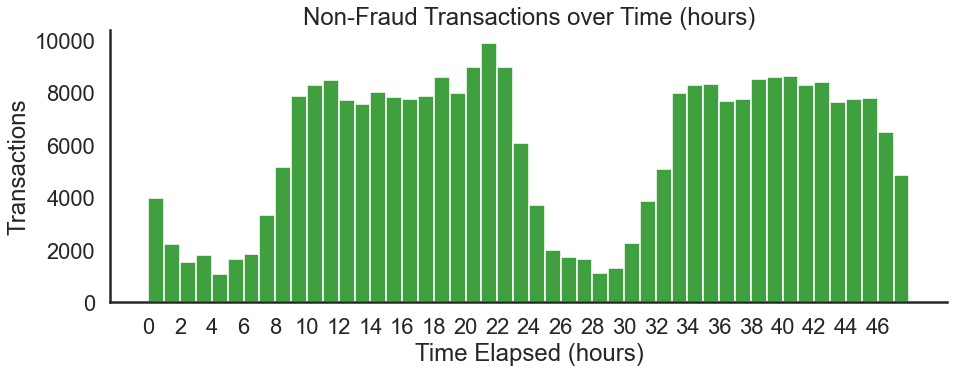

In [11]:
sns.set('poster')
sns.set_style('white')
plt.figure(figsize=(15, 5))
sns.histplot(data=df_valid, x='Time', bins=48, color='green')
plt.xticks(np.arange(0, 60*60*48, step=60*60*2), np.arange(0, 48, step=2))
plt.title('Non-Fraud Transactions over Time (hours)')
plt.xlabel('Time Elapsed (hours)')
plt.ylabel('Transactions')
sns.despine()
plt.savefig('transaction-over-time_non-fraud.png', bbox_inches = 'tight')
plt.show()

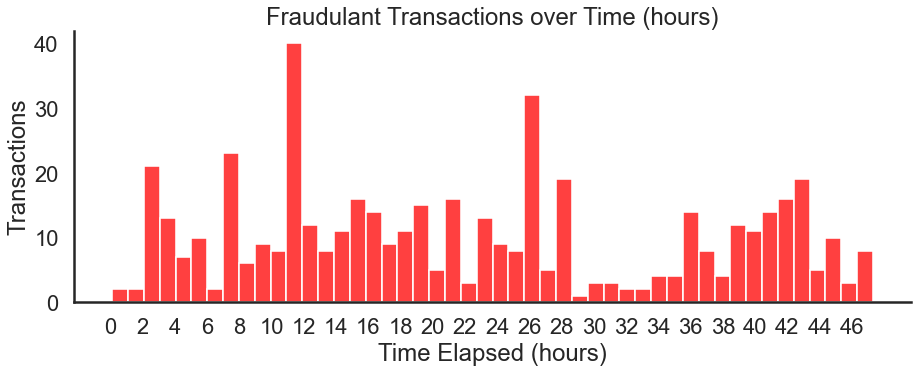

In [12]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df_fraud, x='Time', bins=48, color='red')
plt.xticks(np.arange(0, 60*60*48, step=60*60*2), np.arange(0, 48, step=2))
plt.title('Fraudulant Transactions over Time (hours)')
plt.xlabel('Time Elapsed (hours)')
plt.ylabel('Transactions')
sns.despine()
plt.savefig('transaction-over-time_fraud.png', bbox_inches = 'tight')
plt.show()

In [13]:
# Describe the valid data amounts
df_valid['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
# Describe the valid data amounts
df_fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The average amount of fraudulent transactions are higher, which is highly undesireable. 

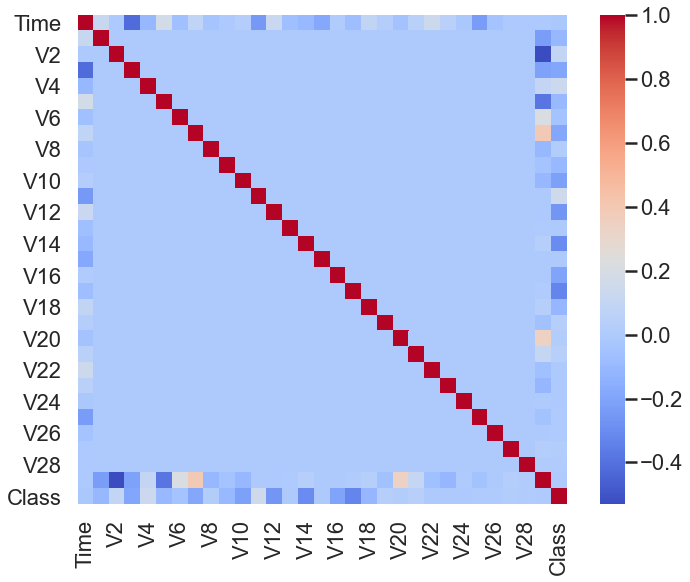

In [15]:
# Correlation matrix 
_ = plt.figure(figsize=(12, 9)) 
_ = sns.heatmap(df.corr(), square=True, cmap='coolwarm')
_ = plt.show()

While there is mostly no correlation due to PCA, we do see the following slightly significant correlations with `Amount`:
* Negative correlation with `V2` and `V5`
* Positive correlation with `V7` and `V20`

## Pre-processing

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Create independant and dependant variables and split
X = df.drop(['Class'], axis=1)
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [18]:
# Review split for fraud class
print("Fraud Class Percentage:")
print(f"Dataset  : {sum(df.Class == 1) / len(df):.3%} ({sum(df.Class == 1)} / {len(df)})")
print(f"Training : {sum(y_train == 1) / len(y_train):.3%} ({sum(y_train == 1)} / {len(y_train)})")
print(f"Testing  : {sum(y_test == 1) / len(y_test):.3%} ({sum(y_test == 1)} / {len(y_test)})")

Fraud Class Percentage:
Dataset  : 0.173% (492 / 284807)
Training : 0.173% (344 / 199364)
Testing  : 0.173% (148 / 85443)


## Modeling

In [19]:
from sklearn.metrics import confusion_matrix, plot_precision_recall_curve, plot_roc_curve

def metrics_plots(model, X_test, y_test):
    '''Plot Recall Precision AUC'''    
    y_pred = model.predict(X_test)
    fig = plt.figure(figsize=(15,5))

    # Confusion matrix 
    ax = fig.add_subplot(121)
    labels = ['Normal', 'Fraud'] 
    conf_matrix = confusion_matrix(y_test, y_pred) 
    sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax); 
    plt.title("Confusion matrix") 
    plt.xlabel('True class') 
    plt.ylabel('Predicted class') 
    
    # AUC graph
    ax = fig.add_subplot(122)
    plot_precision_recall_curve(model, X_test, y_test, ax=ax)
    
    plt.show()

In [20]:
from sklearn.metrics import accuracy_score, auc, f1_score, matthews_corrcoef, precision_recall_curve, precision_score, recall_score

def metrics(model, X_test, y_test):
    '''Print out metrics'''
    # Predict
    y_pred = model.predict(X_test)    
    probabilities = model.predict_proba(X_test)[:,1]

    # Calculate AUC
    precision, recall, _ = precision_recall_curve(y_test, probabilities)
    auc_score = auc(recall, precision)
    
    print(f'Predicted labels: {(np.unique(y_pred))}')
    print(pd.DataFrame(y_pred)[0].value_counts())
    
    print(f'\nAccuracy:  {accuracy_score(y_test, y_pred):.4}')
    print(f'Recall:    {recall_score(y_test, y_pred):.4}')
    print(f'Precision: {precision_score(y_test, y_pred):.4}')
    
    # This style will make it easier to copy and paste for a Markdown table
    print(f'\nAUC    | F1 Score | MCC Score')
    print(f'{auc_score:.4} | {f1_score(y_test, y_pred):.4}   | {matthews_corrcoef(y_test, y_pred):.4}')

In [21]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test, save_path='conf-matrix.png'):
    '''Plot the confusion matrix for a model'''
    y_pred = model.predict(X_test)
    
    labels = ['Normal', 'Fraud'] 
    conf_matrix = confusion_matrix(y_test, y_pred) 

    plt.figure(figsize=(5, 5)) 
    sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d", cmap="Blues", cbar=False); 
    plt.title("Confusion matrix") 
    plt.xlabel('True class') 
    plt.ylabel('Predicted class')
    
    plt.savefig(save_path, bbox_inches = 'tight')
    plt.show()

In [22]:
from sklearn.metrics import plot_precision_recall_curve

def plot_auc_results(models, X_test, y_test, save_path='prauc-results.png'):
    '''Plot Recall Precision AUC results'''
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    
    for model in models:
        plot_precision_recall_curve(model, X_test, y_test, ax=ax)
    
    plt.savefig(save_path, bbox_inches = 'tight')
    plt.show()

## Model 1: Logistic Regression

Predicted labels: [0 1]
0    85313
1      130
Name: 0, dtype: int64

Accuracy:  0.999
Recall:    0.6486
Precision: 0.7385

AUC    | F1 Score | MCC Score
0.5803 | 0.6906   | 0.6916


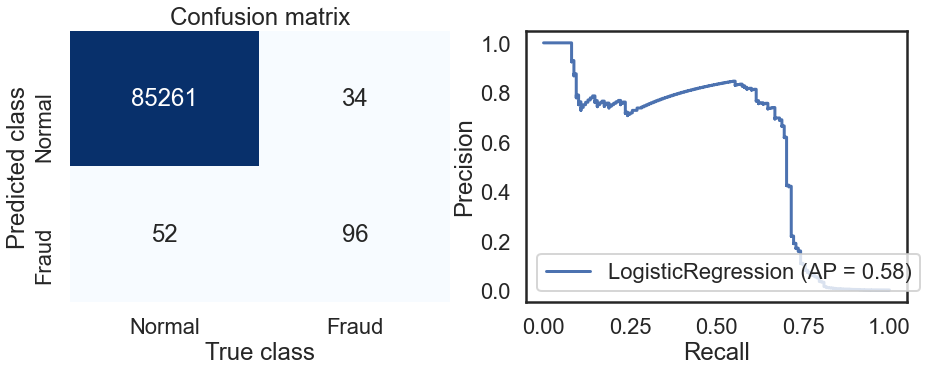

In [23]:
from sklearn.linear_model import LogisticRegression

# Fit model
model1 = LogisticRegression(solver='liblinear', random_state=42).fit(X_train, y_train)

# Evaluate
metrics(model1, X_test, y_test)
metrics_plots(model1, X_test, y_test)

## Model 2: Random Forest Classifier

Predicted labels: [0 1]
0    85328
1      115
Name: 0, dtype: int64

Accuracy:  0.9995
Recall:    0.7432
Precision: 0.9565

AUC    | F1 Score | MCC Score
0.819 | 0.8365   | 0.8429


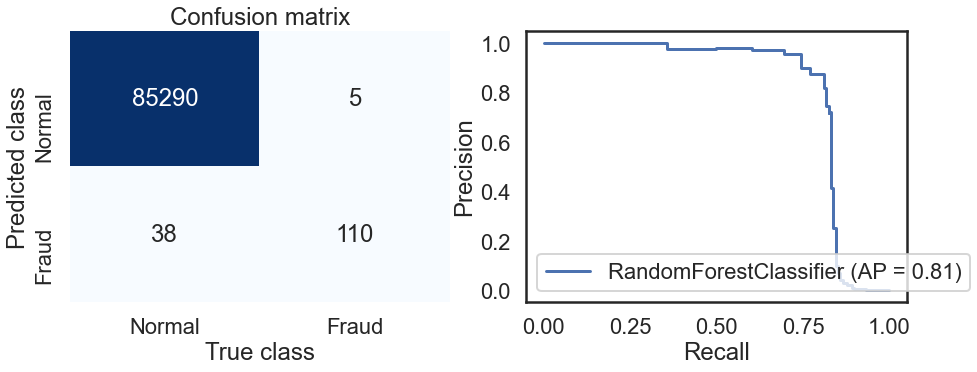

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Fit
model2 = RandomForestClassifier(max_depth=20, n_estimators=10, random_state=42).fit(X_train, y_train)

# Evaluate
metrics(model2, X_test, y_test)
metrics_plots(model2, X_test, y_test)

## Model 3: Support Vector Machines (SVM)

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Scale and fit
pipeline = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True, verbose=True, random_state=42))
pipeline.fit(X_train, y_train)

[LibSVM]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(gamma='auto', probability=True, random_state=42,
                     verbose=True))])

Predicted labels: [0 1]
0    85350
1       93
Name: 0, dtype: int64

Accuracy:  0.9993
Recall:    0.6081
Precision: 0.9677

AUC    | F1 Score | MCC Score
0.804 | 0.7469   | 0.7668


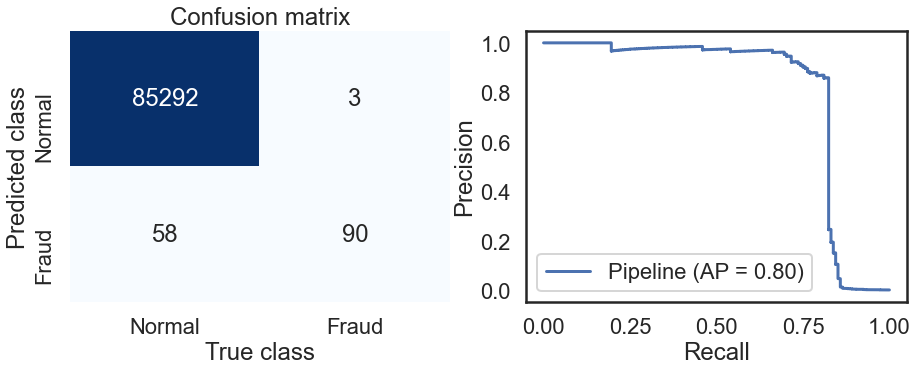

In [26]:
# Evaluate
metrics(pipeline, X_test, y_test)
metrics_plots(pipeline, X_test, y_test)

### Results

| Model | Algorithm | AUC | F1 Score | MCC Score |
|---|---|---|---|---|
| 1  | Logistic Regression  | 0.5803 | 0.6906   | 0.6916 |
| **2**  | **Random Forest Classifier** | 0.819 | 0.8365   | 0.8429 |
| 3  | SVM w/ RBF Kernel | 0.804 | 0.7469   | 0.7668 |

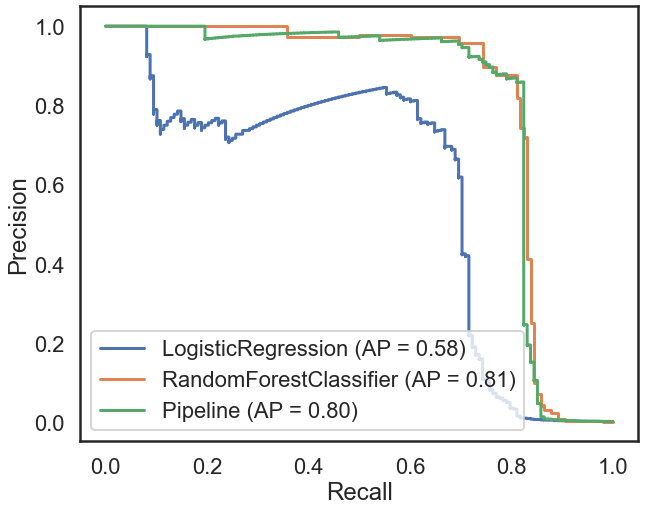

In [27]:
plot_auc_results([model1, model2, pipeline], X_test, y_test, 'model-evaluation-prauc.png')

## RandomForestClassifier with Minority Class Upsampling

### Standard Upsampling (equal resample)

In [28]:
from sklearn.utils import resample

# Reset split
X = df.drop('Class', axis=1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Concatenate training data back together
X = pd.concat([X_train, y_train], axis=1)

# Separate minority and majority classes
not_fraud = X[X.Class == 0]
fraud = X[X.Class == 1]

# Upsample minority class (fraud)
fraud_upsampled = resample(fraud, replace=True, n_samples=len(not_fraud), random_state=42)

# Combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# Check new class counts
upsampled.Class.value_counts()

1    199020
0    199020
Name: Class, dtype: int64

In [29]:
# Update training
X_train = upsampled.drop('Class', axis=1)
y_train = upsampled.Class

Predicted labels: [0 1]
0    85322
1      121
Name: 0, dtype: int64

Accuracy:  0.9993
Recall:    0.7162
Precision: 0.876

AUC    | F1 Score | MCC Score
0.8024 | 0.7881   | 0.7918


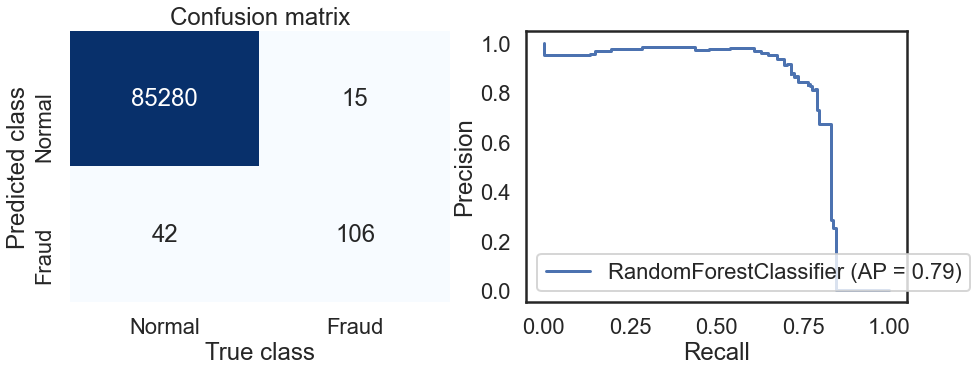

In [30]:
# Fit model
rfc_up_1 = RandomForestClassifier(max_depth=20, n_estimators=10, random_state=42).fit(X_train, y_train)

# Evaluate
metrics(rfc_up_1, X_test, y_test)
metrics_plots(rfc_up_1, X_test, y_test)

### Standard Upsampling (50% resample)

In [31]:
# Reset split
X = df.drop('Class', axis=1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# Concatenate training data back together
X = pd.concat([X_train, y_train], axis=1)

# Separate minority and majority classes
not_fraud = X[X.Class == 0]
fraud = X[X.Class == 1]

# Upsample minority class (fraud)
fraud_upsampled = resample(fraud, replace=True, n_samples=int(len(not_fraud) / 2), random_state=42)

# Combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# Check new class counts
upsampled.Class.value_counts()

0    199020
1     99510
Name: Class, dtype: int64

In [32]:
# Update training
X_train = upsampled.drop('Class', axis=1)
y_train = upsampled.Class

Predicted labels: [0 1]
0    85328
1      115
Name: 0, dtype: int64

Accuracy:  0.9994
Recall:    0.7162
Precision: 0.9217

AUC    | F1 Score | MCC Score
0.8221 | 0.8061   | 0.8122


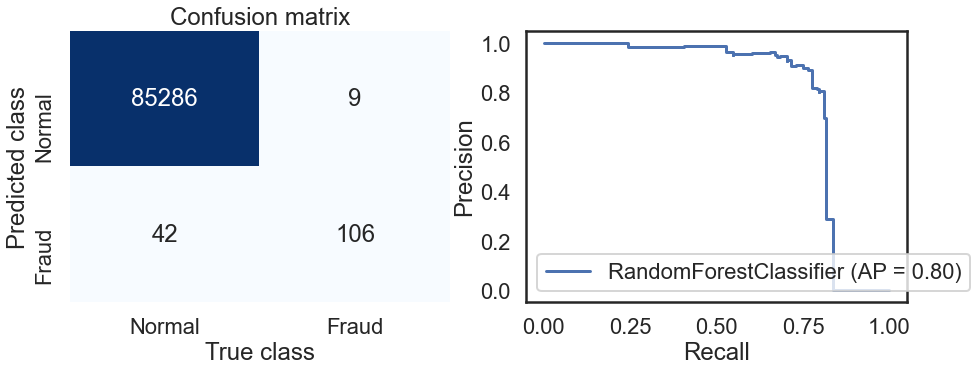

In [33]:
# Fit model
rfc_up_2 = RandomForestClassifier(max_depth=20, n_estimators=10, random_state=42).fit(X_train, y_train)

# Evaluate
metrics(rfc_up_2, X_test, y_test)
metrics_plots(rfc_up_2, X_test, y_test)

### SMOTE  Upsampling (equal resample)

In [34]:
from imblearn.over_sampling import SMOTE

X = df.drop('Class', axis=1)
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

sm = SMOTE(sampling_strategy=1.0, random_state=42)

X_train, y_train = sm.fit_sample(X_train, y_train)

In [35]:
y_train.value_counts()

1    199020
0    199020
Name: Class, dtype: int64

Predicted labels: [0 1]
0    85299
1      144
Name: 0, dtype: int64

Accuracy:  0.9993
Recall:    0.777
Precision: 0.7986

AUC    | F1 Score | MCC Score
0.8216 | 0.7877   | 0.7874


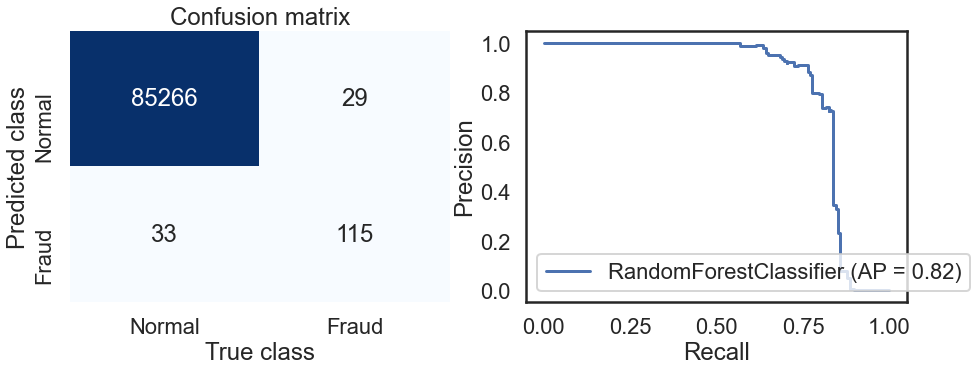

In [36]:
# Fit model
rfc_up_3 = RandomForestClassifier(max_depth=20, n_estimators=10, random_state=42).fit(X_train, y_train)

# Evaluate
metrics(rfc_up_3, X_test, y_test)
metrics_plots(rfc_up_3, X_test, y_test)

### SMOTE  Upsampling (50% resample)

In [37]:
from imblearn.over_sampling import SMOTE

X = df.drop('Class', axis=1)
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

sm = SMOTE(sampling_strategy=0.5, random_state=42)

X_train, y_train = sm.fit_sample(X_train, y_train)

In [38]:
y_train.value_counts()

0    199020
1     99510
Name: Class, dtype: int64

Predicted labels: [0 1]
0    85306
1      137
Name: 0, dtype: int64

Accuracy:  0.9994
Recall:    0.7905
Precision: 0.854

AUC    | F1 Score | MCC Score
0.8094 | 0.8211   | 0.8214


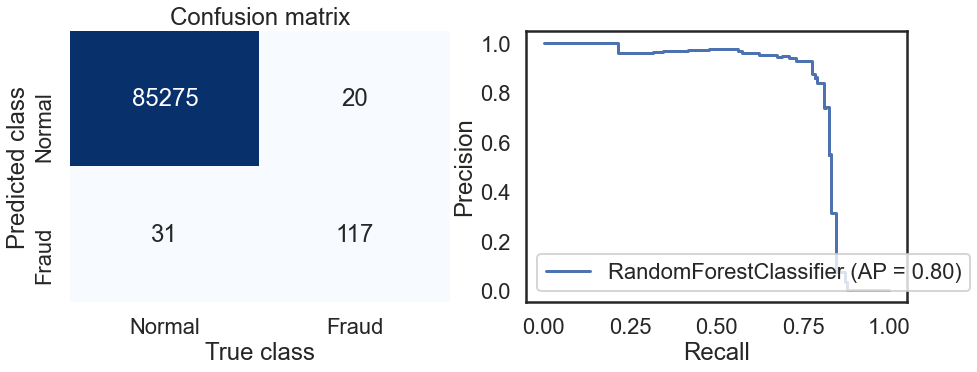

In [39]:
# Fit model
rfc_up_4 = RandomForestClassifier(max_depth=20, n_estimators=10, random_state=42).fit(X_train, y_train)

# Evaluate
metrics(rfc_up_4, X_test, y_test)
metrics_plots(rfc_up_4, X_test, y_test)

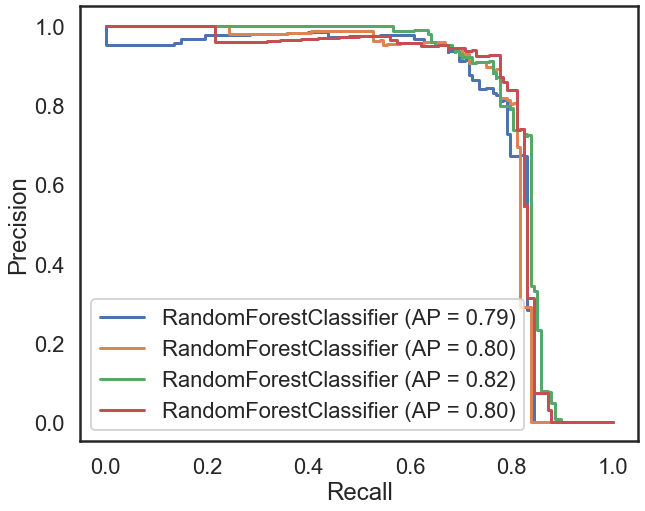

In [40]:
plot_auc_results([rfc_up_1, rfc_up_2, rfc_up_3, rfc_up_4], X_test, y_test, 'rfc-upsample-prauc.png')

### ⚠️ Upsampling is not beneficial to the best model (Random Forest Classifier).

## Hyperparameter Optimization

In [41]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [42]:
# NOTE: this takes >100 minutes to complete
# rf = RandomForestClassifier()
# rf_random = RandomizedSearchCV(estimator = rf, 
#                                param_distributions = random_grid, 
#                                n_iter = 10, 
#                                cv = 3, 
#                                verbose=2, 
#                                random_state=42, 
#                                n_jobs = 2)
# rf_random.fit(X_train, y_train)

best_params = {
    'bootstrap': False,
    'max_depth': 80,
    'max_features': 'auto',
    'min_samples_leaf': 1,
    'min_samples_split': 10,
    'n_estimators': 94,
    'random_state': 42,
    'verbose': 1,
    'n_jobs': -1
}

In [43]:
# Reset split (no upsampling because it didn't help)
X = df.drop('Class', axis=1)
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:  1.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  94 out of  94 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  94 out of  94 | elapsed:    0.3s finished


Predicted labels: [0 1]
0    85325
1      118
Name: 0, dtype: int64

Accuracy:  0.9995
Recall:    0.7635
Precision: 0.9576

AUC    | F1 Score | MCC Score
0.8253 | 0.8496   | 0.8549


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  94 out of  94 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  94 out of  94 | elapsed:    0.3s finished


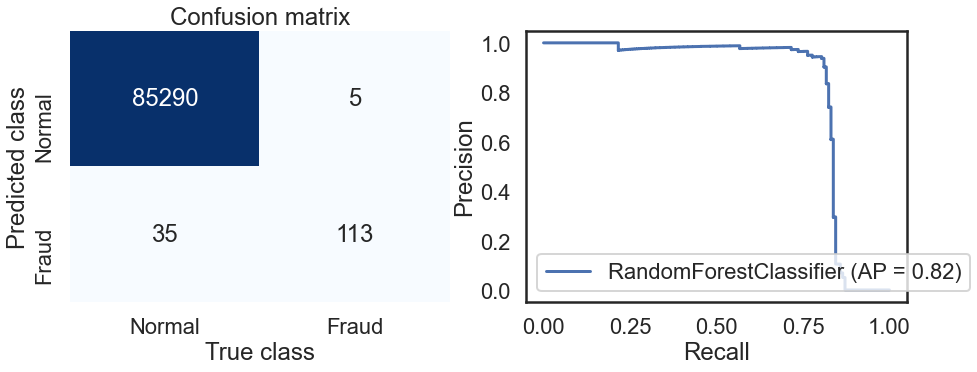

In [44]:
# Fit model
rfc_model = RandomForestClassifier(**best_params).fit(X_train, y_train)

# Evaluate
metrics(rfc_model, X_test, y_test)
metrics_plots(rfc_model, X_test, y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  94 out of  94 | elapsed:    0.3s finished


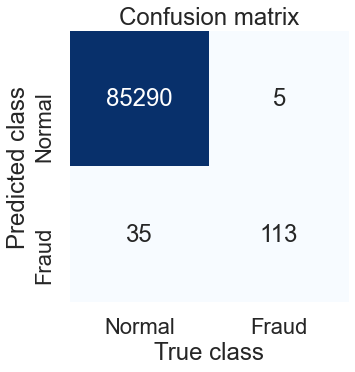

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  94 out of  94 | elapsed:    0.3s finished


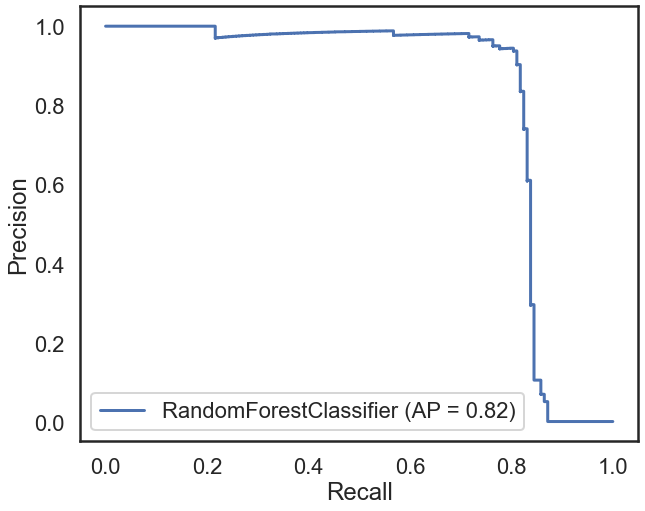

In [45]:
# Confusion Matrix and AUC plot for best model
plot_confusion_matrix(rfc_model, X_test, y_test, 'final-model-conf-matrix.png')
plot_auc_results([rfc_model], X_test, y_test, 'final-model-prauc.png')